<a href="https://colab.research.google.com/github/alexphil12/Energy-forcasting-UDLA/blob/main/prediction_power_lstm_iterate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as cp
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
mesure=["Fecha","Hora"];
mesure.append("Voltaje_(R)_[V]")	
mesure.append("Voltaje_(S)_[V]")	
mesure.append("Voltaje_(T)_[V]")	
mesure.append("Voltaje_(RS)_[V]")	
mesure.append("Voltaje_(ST)_[V]")	
mesure.append("Voltaje_(TR)_[V]")	
mesure.append("Corriente_R_[A]")	
mesure.append("Corriente_S_[A]")	
mesure.append("Corriente_T_[A]")	
mesure.append("Potencia_R_[VA]")	
mesure.append("Potencia_S_[VA]")	
mesure.append("Potencia_T_[VA]")	
mesure.append("Potencia_R_[W]")	
mesure.append("Potencia_S_[W]")	
mesure.append("Potencia_T_[W]")	
mesure.append("Potencia_R_[VAR]")	
mesure.append("Potencia_S_[VAR]")	
mesure.append("Potencia_T_[VAR]")	
mesure.append("Corriente_N_[A]")	
mesure.append("Frecuencia_[Hz]")	
mesure.append("not_sure_1")	
mesure.append("not_sure_2")	
mesure.append("not_sure_3")	
mesure.append("Potencia_3F_[KVA]")	
mesure.append("Potencia_3F_[W]")	
mesure.append("Potencia_3F_[VAR]")	
mesure.append("Factor de Potencia")

In [4]:
data1=pd.read_csv("/content/df_cov_continu_1_1.txt",sep=",",header=0,names=mesure)
data2=pd.read_csv("/content/df_cov_continu_1_2.txt",sep=",",header=0,names=mesure)
data3=pd.read_csv("/content/df_cov_continu_1_3.txt",sep=",",header=0,names=mesure)
data4=pd.read_csv("/content/df_cov_continu_1_4.txt",sep=",",header=0,names=mesure)

In [5]:
train_data_1=data1.iloc[0:round(10253*0.8),:]

test_data_1=data1.iloc[round(10253*0.8):10253,:]

train_data_2=data1.iloc[0:round(9641*0.8),:]

test_data_2=data1.iloc[round(9641*0.8):9641,:]

train_data_3=data3.iloc[0:round(8358*0.8),:]

test_data_3=data3.iloc[round(8358*0.8):8358,:]

train_data_4=data4.iloc[0:round(5363*0.8),:]

test_data_4=data4.iloc[round(5363*0.8):5363,:]

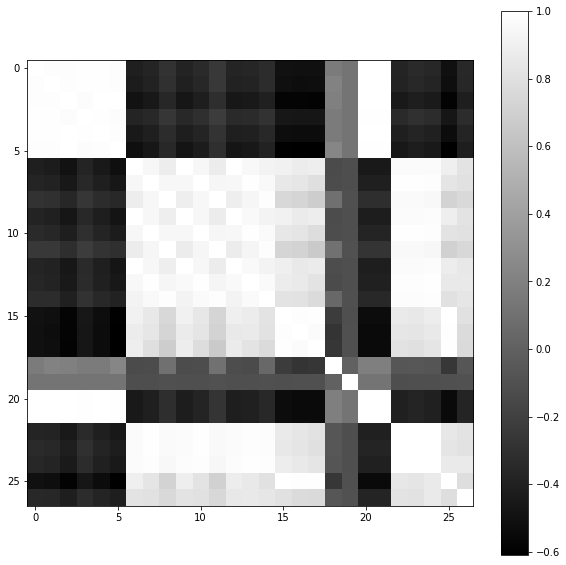

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(data1.corr(),cmap="gray")
plt.colorbar()

In [7]:
#train_data_1.drop(columns=[mesure[0],mesure[3],mesure[4],mesure[1],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=True)
#test_data_1.drop(columns=[mesure[0],mesure[3],mesure[4],mesure[1],mesure[5],mesure[6],mesure[7],mesure[8],mesure[9],mesure[10],mesure[14],mesure[15],mesure[16],mesure[17],mesure[18],mesure[19],mesure[23],mesure[24],mesure[25],mesure[26]],inplace=True)

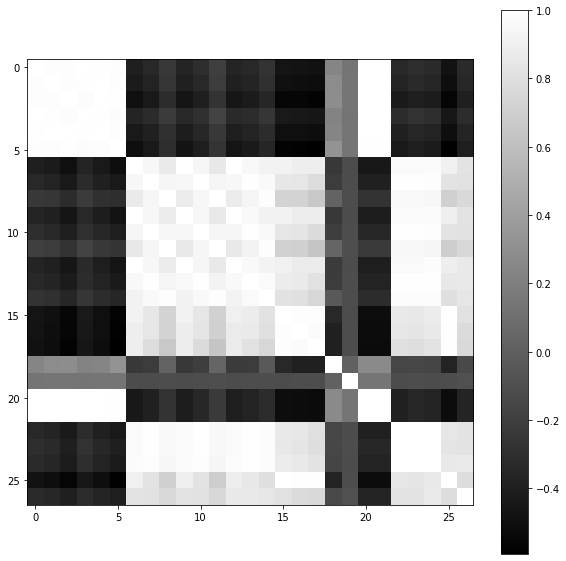

In [8]:
RSG_train_1 = train_data_1.iloc[:,2].values
RSG_test_1=test_data_1.iloc[:,2].values
RSG_train_2=train_data_2.iloc[:,2].values
RSG_test_2=train_data_2.iloc[:,2].values
RSG_train_3 = train_data_3.iloc[:,2].values
RSG_test_3=test_data_3.iloc[:,2].values
RSG_train_4=train_data_4.iloc[:,2].values
RSG_test_4=train_data_4.iloc[:,2].values
plt.figure(figsize=(10,10))
plt.imshow(train_data_1.corr(),cmap="gray")
plt.colorbar()

In [9]:
scaler = MinMaxScaler()
scaler2=MinMaxScaler()
scaler3=MinMaxScaler()
scaler4=MinMaxScaler()
RSG_train_1=np.reshape(RSG_train_1,(-1,1))
RSG_test_1=np.reshape(RSG_test_1,(-1,1))
RSG_train_2=np.reshape(RSG_train_2,(-1,1))
RSG_test_2=np.reshape(RSG_test_2,(-1,1))
RSG_train_3=np.reshape(RSG_train_3,(-1,1))
RSG_test_3=np.reshape(RSG_test_3,(-1,1))
RSG_train_4=np.reshape(RSG_train_4,(-1,1))
RSG_test_4=np.reshape(RSG_test_4,(-1,1))
scaler.fit(RSG_train_1)
scaler2.fit(RSG_train_2)
scaler3.fit(RSG_train_3)
scaler4.fit(RSG_train_4)

MinMaxScaler()

In [10]:
scaled_1_train = scaler.transform(RSG_train_1)
scaled_1_test = scaler.transform(RSG_test_1)
scaled_2_train=scaler2.transform(RSG_train_2)
scaled_2_test=scaler2.transform(RSG_test_2)
scaled_3_train = scaler.transform(RSG_train_3)
scaled_3_test = scaler.transform(RSG_test_3)
scaled_4_train=scaler2.transform(RSG_train_4)
scaled_4_test=scaler2.transform(RSG_test_4)

In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [12]:
n_input = 20
n_features = 0
train_generator_1 = TimeseriesGenerator(scaled_1_train, scaled_1_train, length=n_input, batch_size=10)
test_generator_1=TimeseriesGenerator(scaled_1_test, scaled_1_test, length=n_input, batch_size=10)
train_generator_2 = TimeseriesGenerator(scaled_2_train, scaled_2_train, length=n_input, batch_size=10)
test_generator_2=TimeseriesGenerator(scaled_2_test, scaled_2_test, length=n_input, batch_size=10)
train_generator_3 = TimeseriesGenerator(scaled_3_train, scaled_3_train, length=n_input, batch_size=10)
test_generator_3=TimeseriesGenerator(scaled_3_test, scaled_3_test, length=n_input, batch_size=10)
train_generator_4 = TimeseriesGenerator(scaled_4_train, scaled_4_train, length=n_input, batch_size=10)
test_generator_4=TimeseriesGenerator(scaled_4_test, scaled_4_test, length=n_input, batch_size=10)

In [13]:
X,y = train_generator_1[0]
X1,y1=test_generator_2[0]

In [14]:
print(f'Predicción: \n {y}')
print(f'data: \n {X}')

Predicción: 
 [[0.47663551]
 [0.54413292]
 [0.53569574]
 [0.44483385]
 [0.41679647]
 [0.38200935]
 [0.38875909]
 [0.43444964]
 [0.43029595]
 [0.37889408]]
data: 
 [[[0.57178089]
  [0.5912513 ]
  [0.59800104]
  [0.47287124]
  [0.40122015]
  [0.36863967]
  [0.30944964]
  [0.2836189 ]
  [0.47637591]
  [0.29776739]
  [0.20950156]
  [0.23650052]
  [0.28011423]
  [0.40784008]
  [0.33696781]
  [0.29140706]
  [0.28712357]
  [0.2645379 ]
  [0.30698339]
  [0.32113188]]

 [[0.5912513 ]
  [0.59800104]
  [0.47287124]
  [0.40122015]
  [0.36863967]
  [0.30944964]
  [0.2836189 ]
  [0.47637591]
  [0.29776739]
  [0.20950156]
  [0.23650052]
  [0.28011423]
  [0.40784008]
  [0.33696781]
  [0.29140706]
  [0.28712357]
  [0.2645379 ]
  [0.30698339]
  [0.32113188]
  [0.47663551]]

 [[0.59800104]
  [0.47287124]
  [0.40122015]
  [0.36863967]
  [0.30944964]
  [0.2836189 ]
  [0.47637591]
  [0.29776739]
  [0.20950156]
  [0.23650052]
  [0.28011423]
  [0.40784008]
  [0.33696781]
  [0.29140706]
  [0.28712357]
  [0.264

In [15]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout


In [16]:
from keras.layers.recurrent_v2 import LSTM
# define model
model = Sequential()
model.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model.add(Dense(1, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

In [17]:
model1 = Sequential()
model1.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model1.add(Dense(1, activation = "linear"))

model1.compile(loss='mse', optimizer='adam')

In [18]:
model2 = Sequential()
model2.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model2.add(Dense(1, activation = "linear"))

model2.compile(loss='mse', optimizer='adam')

In [19]:
model3 = Sequential()
model3.add(LSTM(30, input_shape=(n_input,n_features+1),activation='relu',return_sequences=False))
model3.add(Dense(1, activation = "linear"))

model3.compile(loss='mse', optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)
model1.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)
model2.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)
model3.fit(train_generator_1,steps_per_epoch=10, epochs=10,validation_data=test_generator_1)

Epoch 1/10
10/10 [==============================] - 3s 101ms/step - loss: 0.3645 - val_loss: 0.3074
Epoch 2/10
10/10 [==============================] - 1s 73ms/step - loss: 0.2035 - val_loss: 0.2409
Epoch 3/10
10/10 [==============================] - 1s 75ms/step - loss: 0.2257 - val_loss: 0.1838
Epoch 4/10
10/10 [==============================] - 1s 73ms/step - loss: 0.1758 - val_loss: 0.1356
Epoch 5/10
10/10 [==============================] - 1s 67ms/step - loss: 0.1074 - val_loss: 0.0897
Epoch 6/10
10/10 [==============================] - 1s 72ms/step - loss: 0.0805 - val_loss: 0.0432
Epoch 7/10
10/10 [==============================] - 1s 75ms/step - loss: 0.0174 - val_loss: 0.0126
Epoch 8/10
10/10 [==============================] - 1s 71ms/step - loss: 0.0122 - val_loss: 0.0155
Epoch 9/10
10/10 [==============================] - 1s 67ms/step - loss: 0.0112 - val_loss: 0.0081
Epoch 10/10
10/10 [==============================] - 1s 68ms/step - loss: 0.0124 - val_loss: 0.0110
Epoch 1/

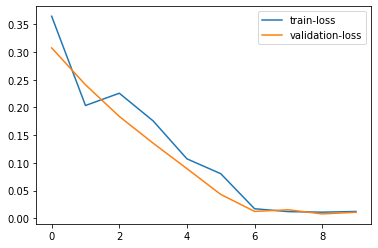

In [22]:
loss_per_epoch = model.history.history['loss']
loss_vall=model.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [23]:
model1.fit(train_generator_2,steps_per_epoch=10, epochs=10,validation_data=test_generator_2)
model2.fit(train_generator_2,steps_per_epoch=10, epochs=10,validation_data=test_generator_2)
model3.fit(train_generator_2,steps_per_epoch=10, epochs=10,validation_data=test_generator_2)

Epoch 1/10
10/10 [==============================] - 2s 221ms/step - loss: 0.0040 - val_loss: 0.0076
Epoch 2/10
10/10 [==============================] - 2s 230ms/step - loss: 0.0099 - val_loss: 0.0074
Epoch 3/10
10/10 [==============================] - 3s 296ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 4/10
10/10 [==============================] - 2s 223ms/step - loss: 0.0072 - val_loss: 0.0078
Epoch 5/10
10/10 [==============================] - 2s 228ms/step - loss: 0.0068 - val_loss: 0.0100
Epoch 6/10
10/10 [==============================] - 2s 233ms/step - loss: 0.0098 - val_loss: 0.0074
Epoch 7/10
10/10 [==============================] - 2s 225ms/step - loss: 0.0046 - val_loss: 0.0074
Epoch 8/10
10/10 [==============================] - 2s 230ms/step - loss: 0.0041 - val_loss: 0.0077
Epoch 9/10
10/10 [==============================] - 2s 222ms/step - loss: 0.0108 - val_loss: 0.0079
Epoch 10/10
10/10 [==============================] - 2s 223ms/step - loss: 0.0091 - val_loss: 0.0090

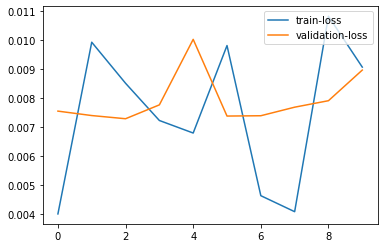

In [24]:
loss_per_epoch = model1.history.history['loss']
loss_vall=model1.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [25]:
model2.fit(train_generator_3,steps_per_epoch=10, epochs=10,validation_data=test_generator_3)
model3.fit(train_generator_3,steps_per_epoch=10, epochs=10,validation_data=test_generator_3)

Epoch 1/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0058 - val_loss: 0.0116
Epoch 2/10
10/10 [==============================] - 1s 82ms/step - loss: 0.0118 - val_loss: 0.0109
Epoch 3/10
10/10 [==============================] - 1s 82ms/step - loss: 0.0038 - val_loss: 0.0111
Epoch 4/10
10/10 [==============================] - 1s 64ms/step - loss: 0.0131 - val_loss: 0.0106
Epoch 5/10
10/10 [==============================] - 1s 81ms/step - loss: 0.0080 - val_loss: 0.0108
Epoch 6/10
10/10 [==============================] - 1s 60ms/step - loss: 0.0081 - val_loss: 0.0135
Epoch 7/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0077 - val_loss: 0.0105
Epoch 8/10
10/10 [==============================] - 1s 57ms/step - loss: 0.0095 - val_loss: 0.0107
Epoch 9/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0115 - val_loss: 0.0128
Epoch 10/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0056 - val_loss: 0.0106
Epoch 1/1

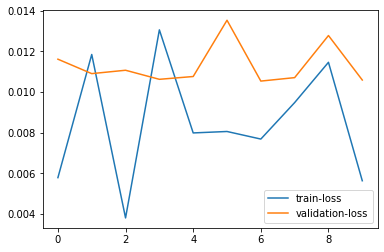

In [26]:
loss_per_epoch = model2.history.history['loss']
loss_vall=model2.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [27]:
model3.fit(train_generator_3,steps_per_epoch=10, epochs=10,validation_data=test_generator_3)

Epoch 1/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0050 - val_loss: 0.0101
Epoch 2/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0088 - val_loss: 0.0104
Epoch 3/10
10/10 [==============================] - 1s 59ms/step - loss: 0.0053 - val_loss: 0.0134
Epoch 4/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0064 - val_loss: 0.0109
Epoch 5/10
10/10 [==============================] - 1s 60ms/step - loss: 0.0055 - val_loss: 0.0098
Epoch 6/10
10/10 [==============================] - 1s 60ms/step - loss: 0.0069 - val_loss: 0.0100
Epoch 7/10
10/10 [==============================] - 1s 81ms/step - loss: 0.0077 - val_loss: 0.0109
Epoch 8/10
10/10 [==============================] - 1s 82ms/step - loss: 0.0057 - val_loss: 0.0097
Epoch 9/10
10/10 [==============================] - 1s 55ms/step - loss: 0.0050 - val_loss: 0.0098
Epoch 10/10
10/10 [==============================] - 1s 58ms/step - loss: 0.0078 - val_loss: 0.0097


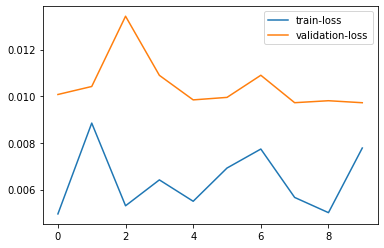

In [28]:
loss_per_epoch = model3.history.history['loss']
loss_vall=model3.history.history['val_loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,label="train-loss")
plt.plot(range(len(loss_vall)),loss_vall,label="validation-loss")
plt.legend()

In [29]:
test_predictions = []
Q=100
N=400
first_eval_batch = scaled_1_train[Q:Q+n_input]
current_batch = first_eval_batch.reshape((1, n_input, n_features+1))
for i in range(N):
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [30]:
L_true=  list(data1[mesure[3]][n_input+1+Q:n_input+1+Q+N])

In [31]:

trainPredict = model.predict(train_generator_1)
trainPredict1= model1.predict(train_generator_1)
trainPredict2 = model2.predict(train_generator_1)
trainPredict3= model3.predict(train_generator_1)
true_pre=scaler.inverse_transform(trainPredict)
true_pre1=scaler.inverse_transform(trainPredict1)
true_pre2=scaler.inverse_transform(trainPredict2)
true_pre3=scaler.inverse_transform(trainPredict3)


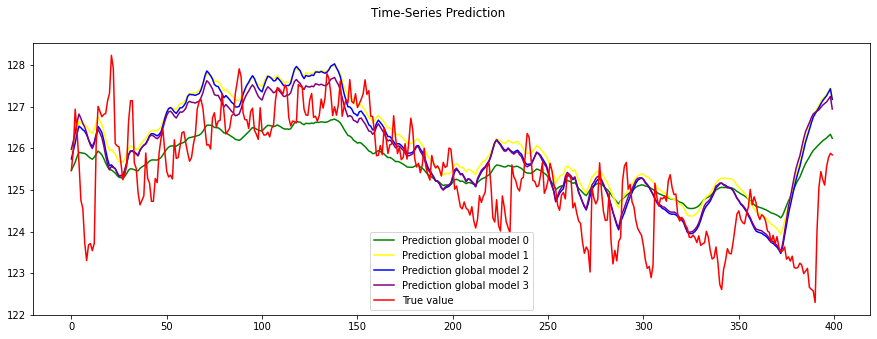

In [32]:
fig=plt.figure(figsize=(15,5))
plt.suptitle('Time-Series Prediction')
plt.plot(range(len(L_true)),true_pre[n_input+Q:n_input+Q+N],label='Prediction global model 0',c="green")
plt.plot(range(len(L_true)),true_pre1[n_input+Q:n_input+Q+N],label='Prediction global model 1',c="yellow")
plt.plot(range(len(L_true)),true_pre2[n_input+Q:n_input+Q+N],label='Prediction global model 2',c="blue")
plt.plot(range(len(L_true)),true_pre3[n_input+Q:n_input+Q+N],label='Prediction global model 3',c="purple")
plt.plot(range(len(L_true)),L_true,label='True value',c="red")
plt.legend()
plt.show()